<a href="https://colab.research.google.com/github/AmarjitMahadik007/Syntactic-Processing/blob/master/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Identifying Entities in Healthcare Data

##Workspace set up: Import and Install useful packages.

In [2]:
!pip install pycrf
!pip install sklearn-crfsuite

  Preparing metadata (setup.py) ... done
  Created wheel for pycrf: filename=pycrf-0.0.1-py3-none-any.whl size=1870 sha256=43b3452362fd013f431408a5197e2435ab76d7d27182bd3c8c0b5b2988251634
  Stored in directory: /root/.cache/pip/wheels/fd/3a/fb/e4d15c9c2b169f43811b23a863ee9717ff3eda5d2301789043
Successfully built pycrf
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.4 MB/s eta 0:00:00


In [3]:
import spacy
import sklearn_crfsuite
from sklearn_crfsuite import metrics

model = spacy.load("en_core_web_sm")

##Data Preprocessing

The dataset provided is in the form of one word per line. Let's understand the format of data below:
- Suppose there are *x* words in a sentence, then there will be *x* continuous lines with one word in each line.
- Further, the two sentences are separated by empty lines. The labels for the data follow the same format.

**We need to pre-process the data to recover the complete sentences and their labels.**


### Construct the proper sentences from individual words and print the 5 sentences.

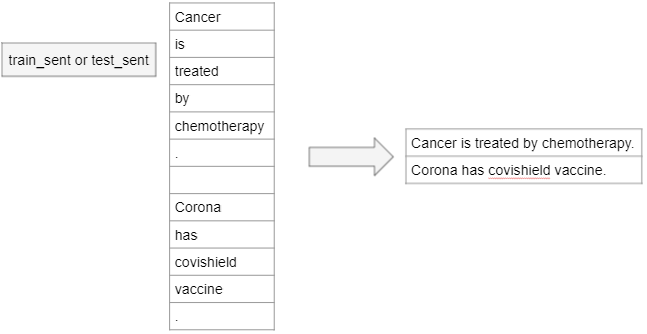

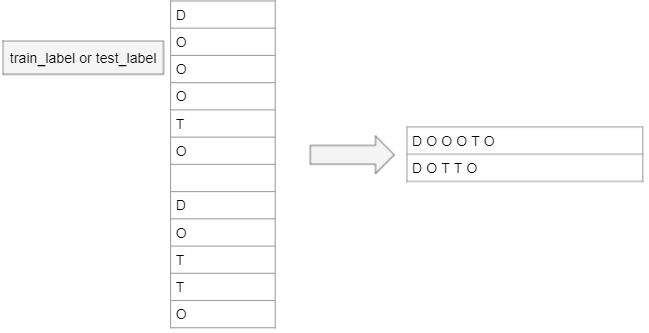

In [4]:
with open('train_sent', 'r') as train_sent_file:
  train_sentences = train_sent_file.readlines()

with open('train_label', 'r') as train_labels_file:
  train_labels = train_labels_file.readlines()

with open('test_sent', 'r') as test_sent_file:
  test_sentences = test_sent_file.readlines()

with open('test_label', 'r') as test_labels_file:
  test_labels = test_labels_file.readlines()


In [5]:
# Print the 6th sentence in the test set i.e. index value 5.
print(train_sentences[0:48])

# Print the labels of this sentence
print(train_labels[0:48])

['All\n', 'live\n', 'births\n', '>\n', 'or\n', '=\n', '23\n', 'weeks\n', 'at\n', 'the\n', 'University\n', 'of\n', 'Vermont\n', 'in\n', '1995\n', '(\n', 'n\n', '=\n', '2395\n', ')\n', 'were\n', 'retrospectively\n', 'analyzed\n', 'for\n', 'delivery\n', 'route\n', ',\n', 'indication\n', 'for\n', 'cesarean\n', ',\n', 'gestational\n', 'age\n', ',\n', 'parity\n', ',\n', 'and\n', 'practice\n', 'group\n', '(\n', 'to\n', 'reflect\n', 'risk\n', 'status\n', ')\n', '\n', 'The\n', 'total\n']
['O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', '\n', 'O\n', 'O\n']


In [6]:
train_sentences[0].strip('\n')+' '+ train_sentences[1].strip('\n')

'All live'

In [7]:
Sent_merged = ''
train_sentences_merged = []
for i in range(len(train_sentences)):
  if train_sentences[i] != '\n':
    Sent_merged += train_sentences[i].strip('\n')+' '
  else:
    train_sentences_merged.append(Sent_merged)
    Sent_merged = ''

In [8]:
label_merged = ''
train_labels_merged = []
for i in range(len(train_labels)):
  if train_labels[i] != '\n':
    label_merged += train_labels[i].strip('\n')+' '
  else:
    train_labels_merged.append(label_merged)
    label_merged = ''

In [9]:
Sent_merged = ''
test_sentences_merged = []
for i in range(len(test_sentences)):
  if test_sentences[i] != '\n':
    Sent_merged += test_sentences[i].strip('\n')+' '
  else:
    test_sentences_merged.append(Sent_merged)
    Sent_merged = ''

In [10]:
label_merged = ''
test_labels_merged = []
for i in range(len(test_labels)):
  if test_labels[i] != '\n':
    label_merged += test_labels[i].strip('\n')+' '
  else:
    test_labels_merged.append(label_merged)
    label_merged = ''

### Count the number of sentences in the processed train and test dataset

In [11]:
print(len(train_sentences_merged))
print(len(test_sentences_merged))

2599
1056


### Count the number of lines of labels in the processed train and test dataset.

In [12]:
print(len(train_labels_merged))
print(len(test_labels_merged))

2599
1056


##Concept Identification

We will first explore what are the various concepts present in the dataset. For this, we will use PoS Tagging.



### Extract those tokens which have NOUN or PROPN as their PoS tag and find their frequency

In [15]:
import requests
import pandas as pd
from nltk import FreqDist
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [26]:
def plot_word_frequency(words, top_n=10):
    no_stops = [word.strip('\n') for word in words if word.strip('\n') not in stopwords.words("english")]
    word_freq = FreqDist(no_stops)
    top_words = word_freq.most_common(top_n)
    df = pd.DataFrame(top_words, columns=['Word', 'Frequency']) # Create dataframe from most frequent words
    plt.figure(figsize=(12, 6))
    barplot = sns.barplot(x='Word', y='Frequency', data=df, width=0.8)
    barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

<ipython-input-24-5877405d49d8>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, ha='right')


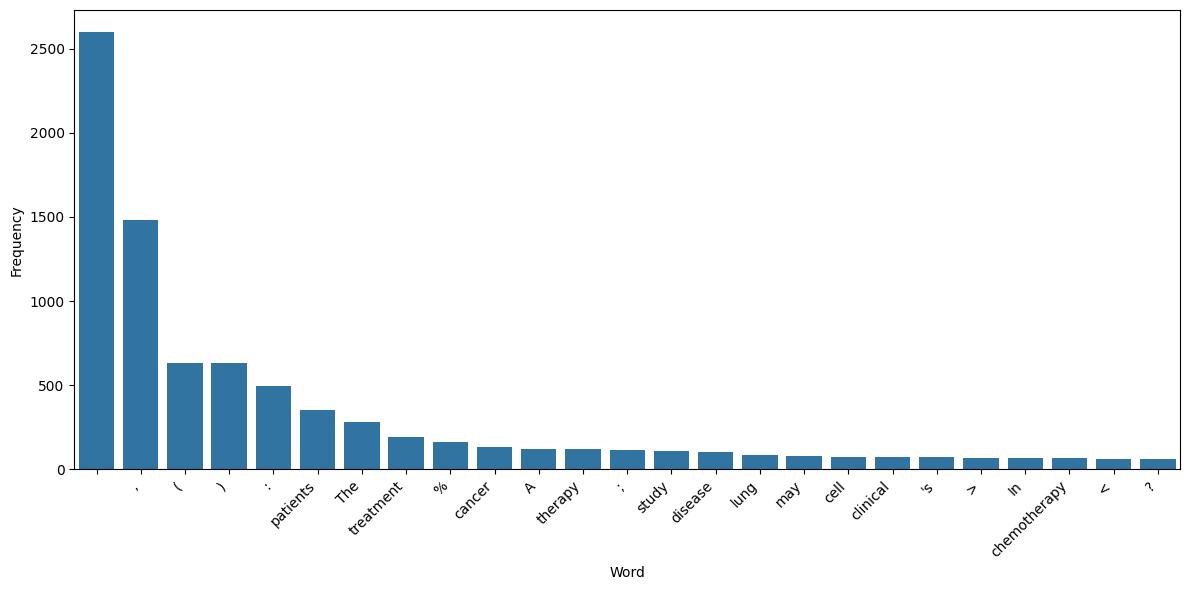

In [25]:
plot_word_frequency(train_sentences,25)

In [31]:
train_sentences_merged[3]

"The `` corrected '' cesarean rate ( maternal-fetal medicine and transported patients excluded ) was 12.4 % ( 273 of 2194 ) , and the `` corrected '' primary rate was 9.6 % ( 190 of 1975 ) "

In [32]:
import pandas as pd
import numpy as np
import os
import spacy
from tqdm import tqdm

### Print the top 25 most common tokens with NOUN or PROPN PoS tags

In [33]:
# loading the spacy model
nlp=spacy.load('en_core_web_sm',disable=['parser','ner'])

In [73]:
POS_TAG = nlp(train_sentences_merged[15])
for tok in POS_TAG:
  # if tok.pos_=="NOUN" or tok.pos_ == 'PROPN':
    print(tok.text,"---",tok.lemma_,"---",tok.pos_)

All --- all --- DET
patients --- patient --- NOUN
were --- be --- AUX
managed --- manage --- VERB
by --- by --- ADP
an --- an --- DET
intensified --- intensify --- VERB
protocol --- protocol --- NOUN
, --- , --- PUNCT
including --- include --- VERB
stringent --- stringent --- ADJ
glycemic --- glycemic --- ADJ
control --- control --- NOUN


In [40]:
nouns = []
for POS_TAG in tqdm(train_sentences_merged):
    doc = nlp(POS_TAG)
    for tok in doc:
        if tok.pos_=="NOUN" or tok.pos_ == 'PROPN':
            nouns.append(tok.lemma_.lower())

100%|██████████| 2599/2599 [00:12<00:00, 210.08it/s]


In [41]:
pd.Series(nouns).value_counts().head(25)

patient         412
treatment       216
study           167
%               161
cancer          156
cell            146
effect          129
disease         127
therapy         125
group            98
case             91
lung             91
result           87
year             73
gene             72
rate             70
chemotherapy     68
use              68
trial            65
conclusion       61
protein          60
drug             59
child            59
tumor            58
analysis         57
Name: count, dtype: int64

In [53]:
# Create a DataFrame from the lists
df = pd.DataFrame({'Word': train_sentences, 'NER_Tag': train_labels})


In [55]:
df.head()

,Word,NER_Tag
0,All\n,O\n
1,live\n,O\n
2,births\n,O\n
3,>\n,O\n
4,or\n,O\n


In [58]:

# Filter the DataFrame to include only rows with NER tags 'D' and 'T'
filtered_df = df[df['NER_Tag'].isin(['D\n'])]

# Display the filtered DataFrame
print(filtered_df)


                   Word NER_Tag
312       gestational\n     D\n
313          diabetes\n     D\n
432        macrosomic\n     D\n
433           infants\n     D\n
434                in\n     D\n
...                 ...     ...
48479          stable\n     D\n
48480          angina\n     D\n
48481        pectoris\n     D\n
48489  osteoarthritis\n     D\n
48494    Pneumococcal\n     D\n

[3439 rows x 2 columns]


In [59]:
# Create a DataFrame from the lists
df_sent = pd.DataFrame({'Word': train_sentences_merged, 'NER_Tag': train_labels_merged})
df_sent.head()

,Word,NER_Tag
0,All live births > or = 23 weeks at the Univers...,O O O O O O O O O O O O O O O O O O O O O O O ...
1,The total cesarean rate was 14.4 % ( 344 of 23...,O O O O O O O O O O O O O O O O O O O O O O O ...
2,Abnormal presentation was the most common indi...,O O O O O O O O O O O O O O O
3,The `` corrected '' cesarean rate ( maternal-f...,O O O O O O O O O O O O O O O O O O O O O O O ...
4,Arrest of dilation was the most common indicat...,O O O O O O O O O O O O O O O O O O O O O O


In [60]:
# Function to check if 'D' or 'T' is in the NER Tag column
def contains_D_or_T(tags):
    return 'D' in tags.split() or 'T' in tags.split()

# Filter rows
filtered_df = df_sent[df_sent['NER_Tag'].apply(contains_D_or_T)]

In [61]:
filtered_df.head()

,Word,NER_Tag
12,The study population included 84 women with ge...,O O O O O O O D D O O O O O O O O O O O O O O ...
15,All patients were managed by an intensified pr...,O O O O O O O O O O O T T
18,We conclude that to reduce the rate of macroso...,O O O O O O O O D D D D D D O T T T O O O O O ...
20,Down syndrome ( 12 cases ) and Edward syndrome...,D D O O O O O D D O O O O O O O O D O O O O O ...
21,Down syndrome fetuses ( 41.7 % ) had prenatall...,D D O O O O O O O O O O O O O O D D O O O O O ...


In [83]:
POS_TAG = nlp(train_sentences_merged[12])
for tok in POS_TAG:
  # if tok.pos_=="NOUN" or tok.pos_ == 'PROPN':
    print(tok.text,"---",tok.lemma_,"---",tok.pos_)

The --- the --- DET
study --- study --- NOUN
population --- population --- NOUN
included --- include --- VERB
84 --- 84 --- NUM
women --- woman --- NOUN
with --- with --- ADP
gestational --- gestational --- ADJ
diabetes --- diabete --- NOUN
, --- , --- PUNCT
ascertained --- ascertain --- VERB
by --- by --- ADP
universal --- universal --- ADJ
screening --- screening --- NOUN
of --- of --- ADP
all --- all --- DET
women --- woman --- NOUN
attending --- attend --- VERB
the --- the --- DET
antenatal --- antenatal --- ADJ
clinic --- clinic --- NOUN
of --- of --- ADP
the --- the --- DET
Hadassah --- Hadassah --- PROPN
Medical --- Medical --- PROPN
Center --- Center --- PROPN
, --- , --- PUNCT
over --- over --- ADP
a --- a --- DET
2 --- 2 --- NUM
- --- - --- PUNCT
year --- year --- NOUN
period --- period --- NOUN


In [85]:
import spacy
from spacy import displacy
import pandas as pd
nlp = spacy.load("en_core_web_sm")
doc = nlp(train_sentences_merged[15])
for tok in doc:
    print(tok.text,tok.dep_, spacy.explain(tok.dep_))

All det determiner
patients nsubjpass nominal subject (passive)
were auxpass auxiliary (passive)
managed ROOT root
by agent agent
an det determiner
intensified amod adjectival modifier
protocol pobj object of preposition
, punct punctuation
including prep prepositional modifier
stringent amod adjectival modifier
glycemic amod adjectival modifier
control pobj object of preposition


In [87]:
doc = nlp(train_sentences_merged[18])
displacy.render(doc, style='dep', jupyter=True)


## Defining features for CRF





In [ ]:
# Let's define the features to get the feature value for one word.
# f1 = input word is a noun
# f2 = input word is adjective
# f3 = input word has a dependency tag of 'amod'
# f4 = input word has a dependency tag of 'pobj'

def getFeaturesForOneWord(sentence, pos):
  word = sentence[pos]

  POS_TAG = nlp(train_sentences_merged[12])
  for tok in POS_TAG:
  # if tok.pos_=="NOUN" or tok.pos_ == 'PROPN':
    print(tok.text,"---",tok.lemma_,"---",tok.pos_)

  features = [
    'word.lower=' + word.lower(), # serves as word id
    'word[-3:]=' + word[-3:],     # last three characters
    'word[-2:]=' + word[-2:],     # last two characters
    'word.isupper=%s' % word.isupper(),  # is the word in all uppercase
    'word.isdigit=%s' % word.isdigit(),  # is the word a number
    'words.startsWithCapital=%s' % word[0].isupper() # is the word starting with a capital letter
  ]

  if(pos > 0):
    prev_word = sentence[pos-1]
    features.extend([
    'prev_word.lower=' + prev_word.lower(),
    'prev_word.isupper=%s' % prev_word.isupper(),
    'prev_word.isdigit=%s' % prev_word.isdigit(),
    'prev_words.startsWithCapital=%s' % prev_word[0].isupper()
  ])
  else:
    features.append('BEG') # feature to track begin of sentence

  if(pos == len(sentence)-1):
    features.append('END') # feature to track end of sentence

  return features

## Getting the features

### Write a code/function to get the features for a sentence

In [ ]:
# Write a code to get features for a sentence.


### Write a code/function to get the labels of a sentence

In [ ]:
# Write a code to get the labels for a sentence.


## Define input and target variables


Correctly computing X and Y sequence matrices for training and test data.
Check that both sentences and labels are processed

### Define the features' values for each sentence as input variable  for CRF model in test and the train dataset

### Define the labels as the target variable for test and the train dataset

## Build the CRF Model

In [ ]:
# Build the CRF model.


## Evaluation

### Predict the labels of each of the tokens in each sentence of the test dataset that has been pre processed earlier.

### Calculate the f1 score using the actual labels and the predicted labels of the test dataset.

##Identifying Diseases and Treatments using Custom NER

We now use the CRF model's prediction to prepare a record of diseases identified in the corpus and treatments used for the diseases.



### Create the logic to get all the predicted treatments (T) labels corresponding to each disease (D) label in the test dataset.

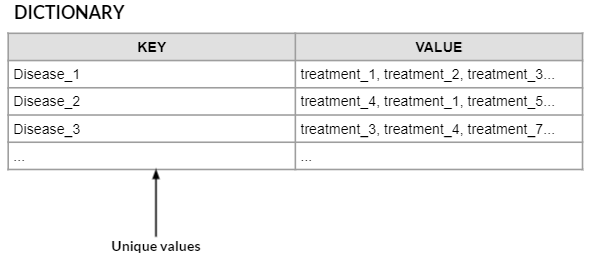

### Predict the treatment for the disease name: 'hereditary retinoblastoma'